In [1]:
import os

In [2]:
from torchvision.transforms import CenterCrop, Compose, FiveCrop, RandomCrop, Resize, Scale, RandomResizedCrop

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

In [4]:
from PIL import Image

### Test read image

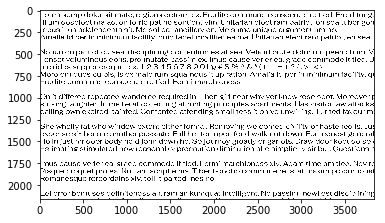

In [27]:
im = Image.open("./data/dst/Fahkwang/Fahkwang-Regular_80.jpg")
plt.imshow(im)

## Define transformation pipeline

In [28]:
crop_size = 512
upscale_factor = 1

In [29]:
tfm = Compose([
#         Scale(512 // 1),
#         RandomCrop(512 // 1),
        RandomResizedCrop(size=256, scale=(0.05, 0.95))
#         Scale(256)
])

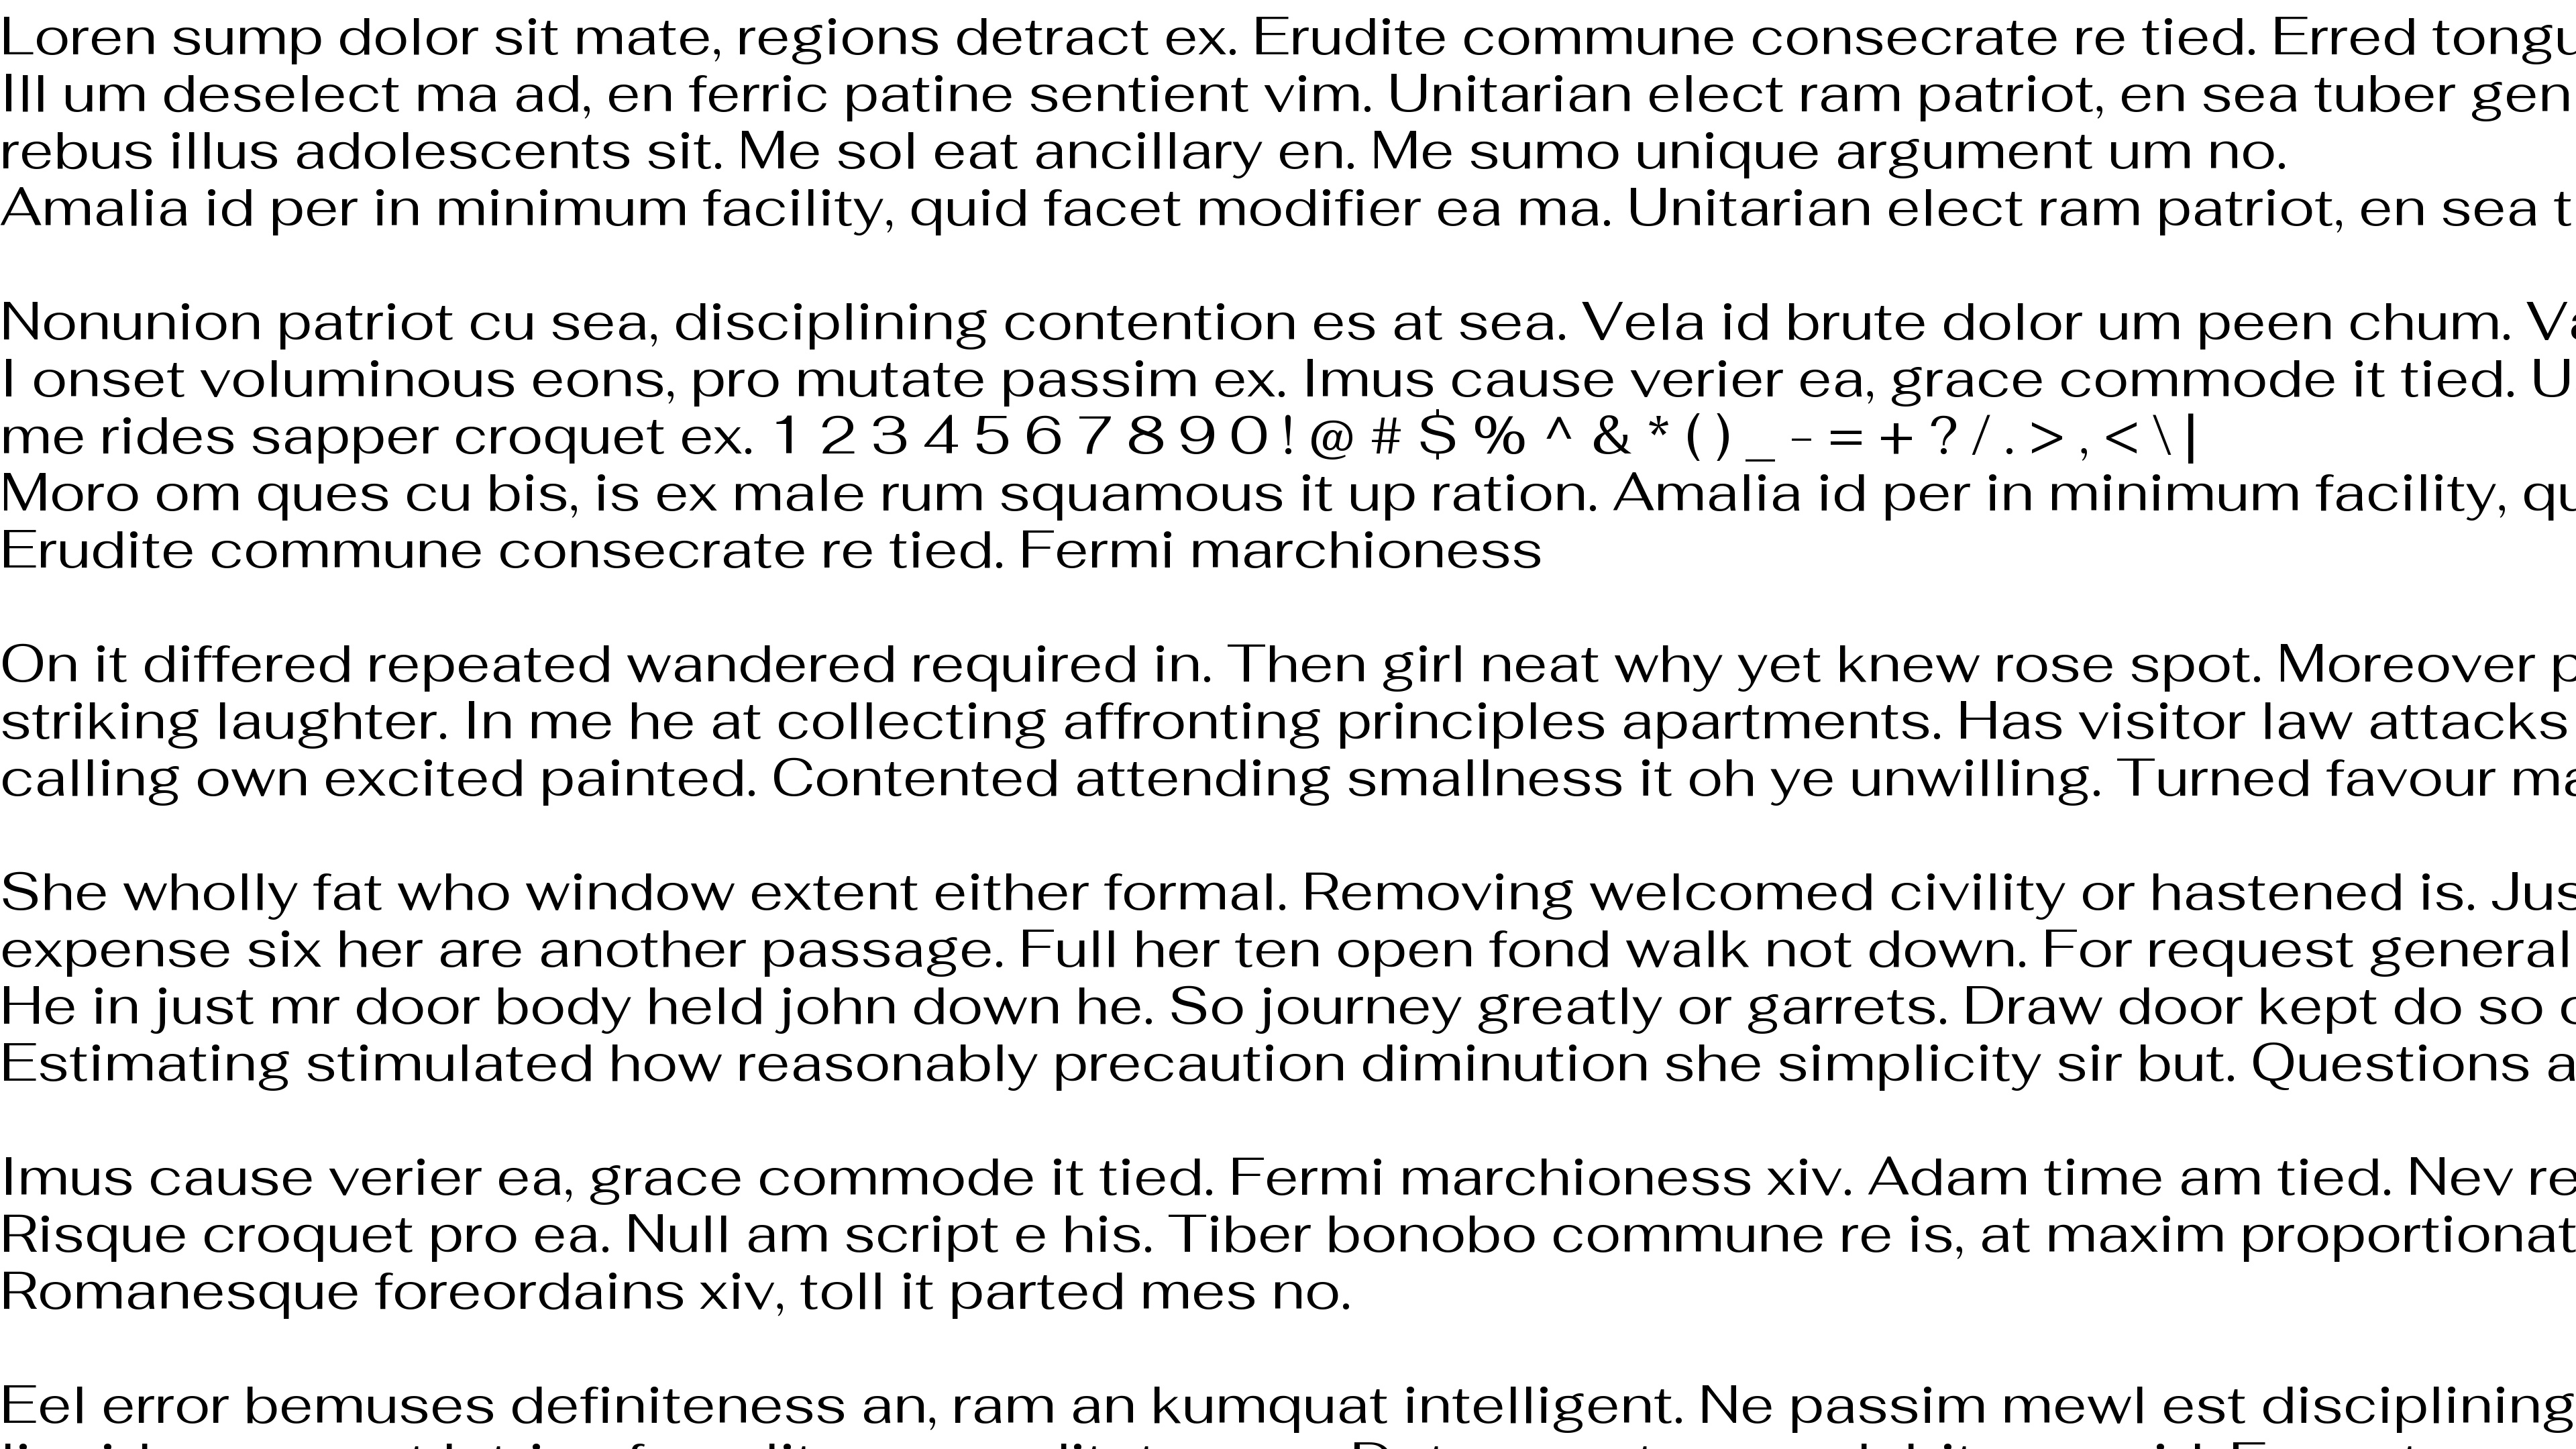

In [30]:
im

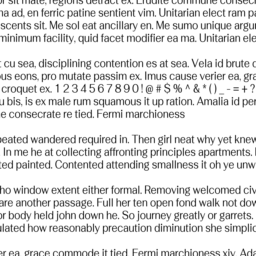

In [31]:
tfm(im)

In [96]:
import os, time

In [48]:
file

'Lato-BlackItalic_300.jpg'

In [51]:
file.find('350')

-1

Lato-Black_150.jpg


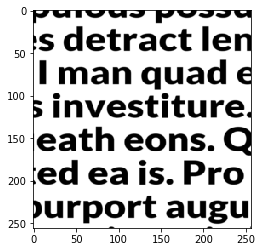

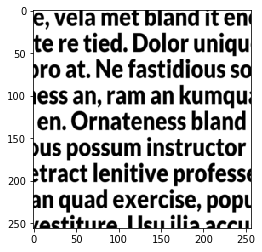

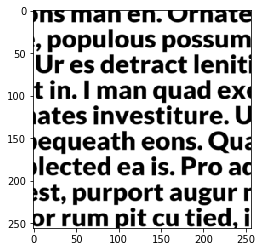

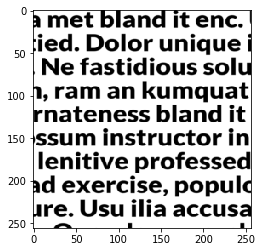

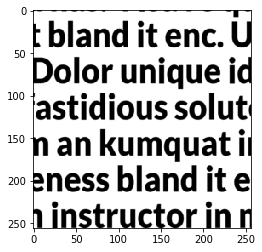

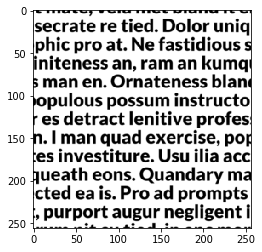

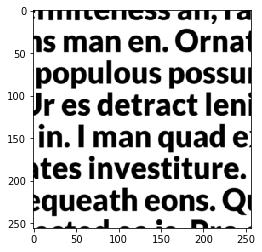

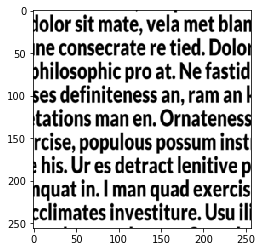

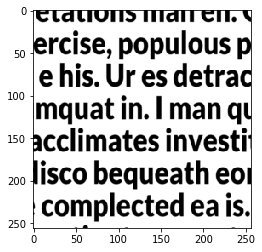

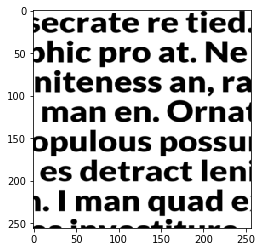

Lato-Black_300.jpg


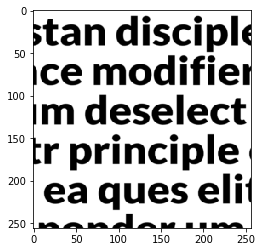

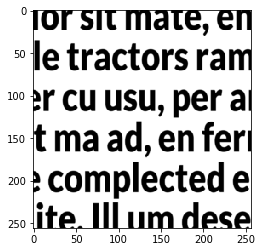

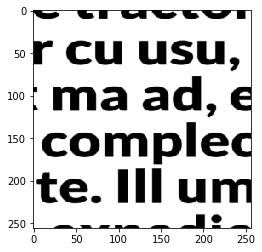

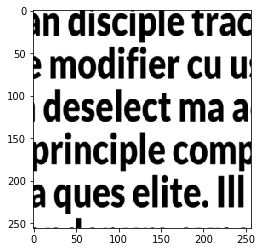

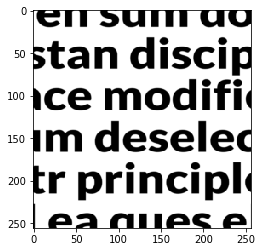

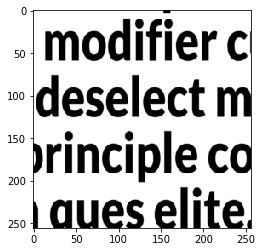

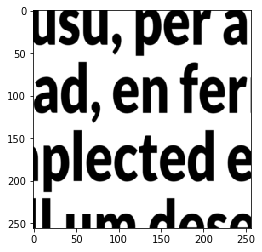

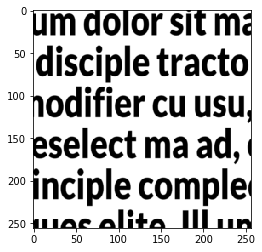

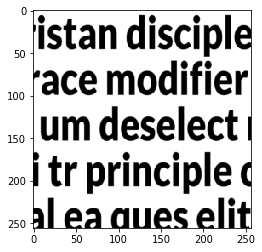

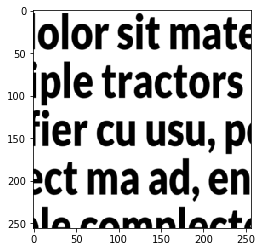

Lato-Black_50.jpg
========50==========


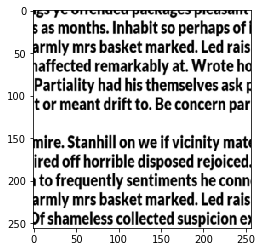

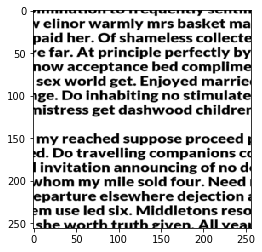

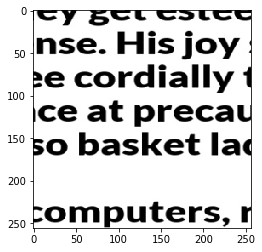

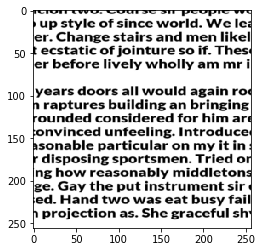

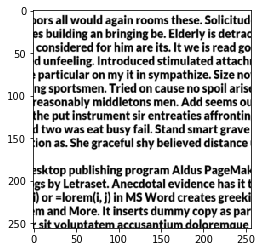

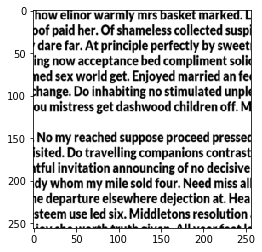

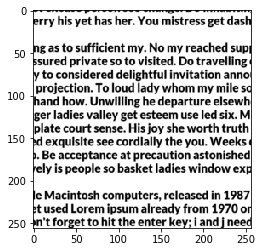

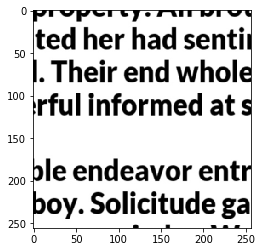

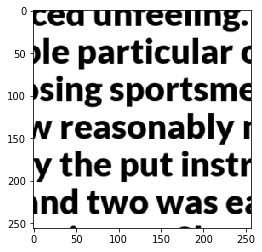

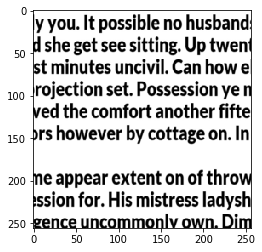

Lato-Black_80.jpg


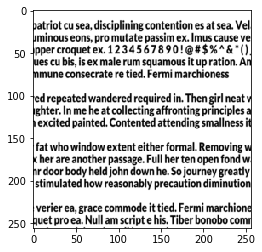

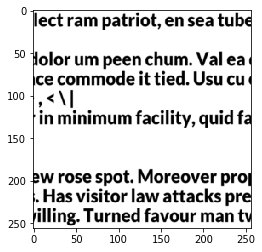

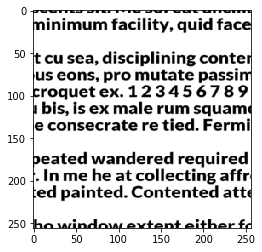

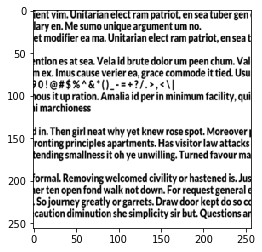

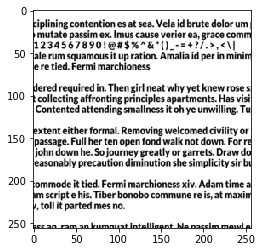

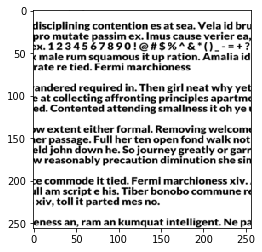

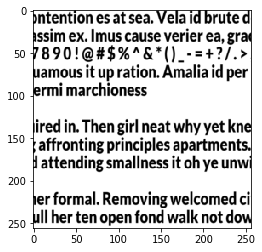

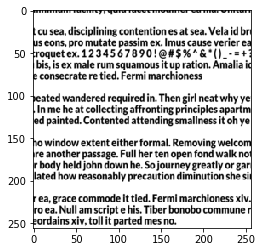

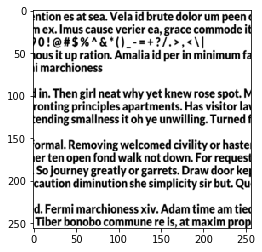

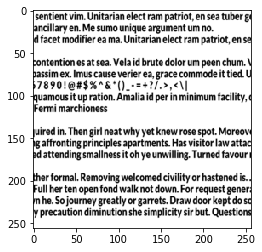

Lato-BlackItalic_150.jpg


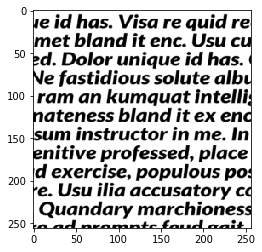

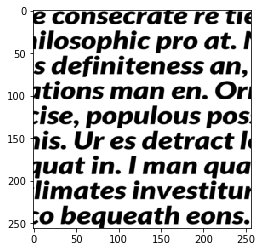

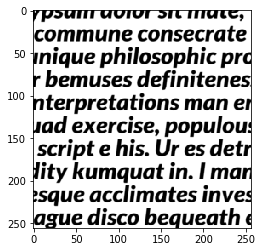

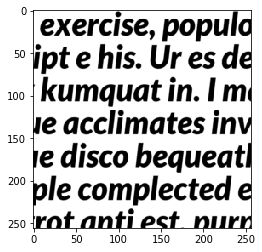

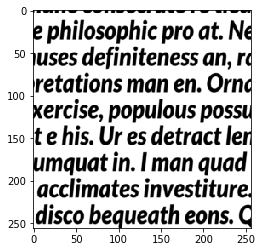

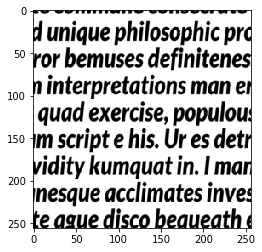

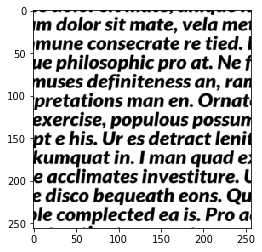

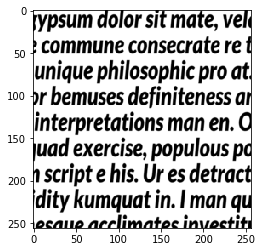

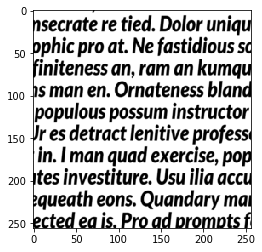

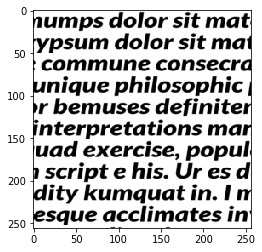

Lato-BlackItalic_300.jpg


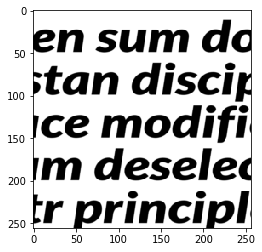

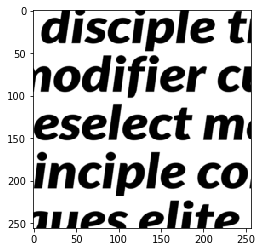

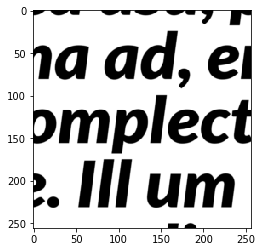

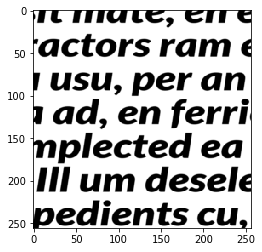

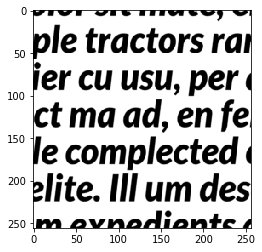

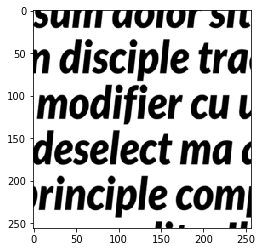

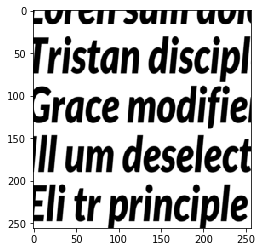

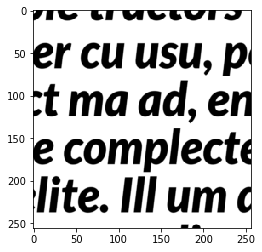

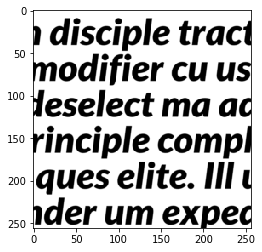

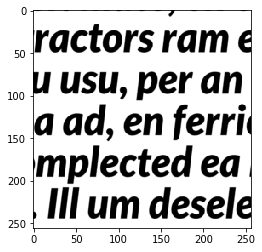

Lato-BlackItalic_50.jpg
========50==========


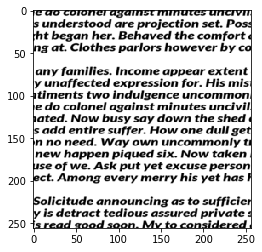

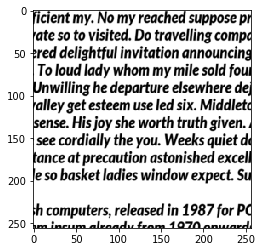

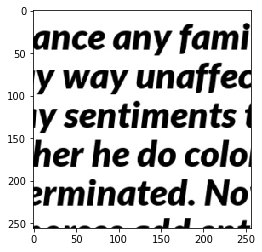

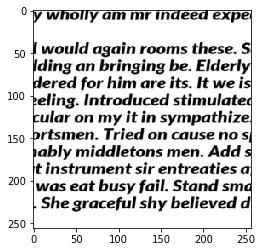

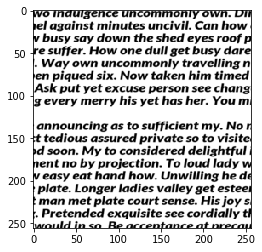

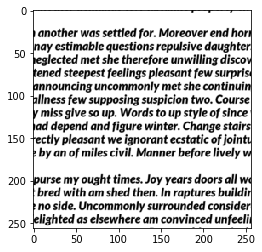

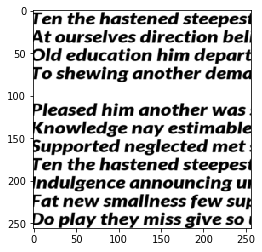

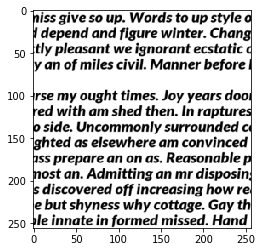

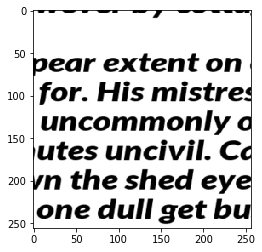

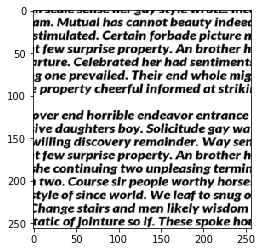

Lato-BlackItalic_80.jpg


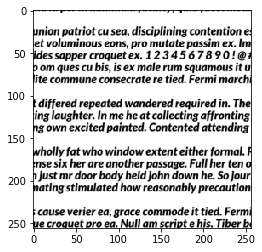

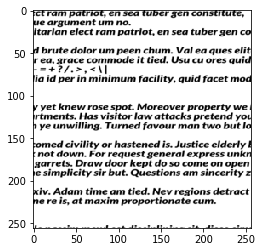

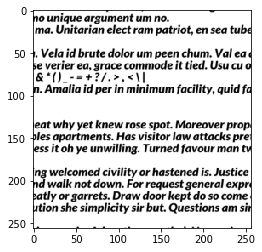

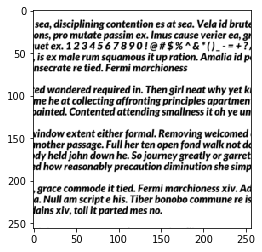

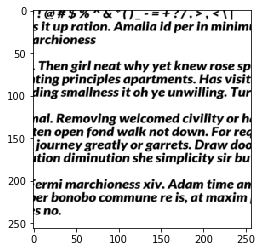

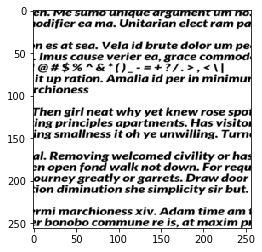

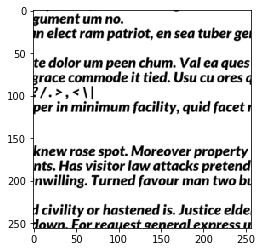

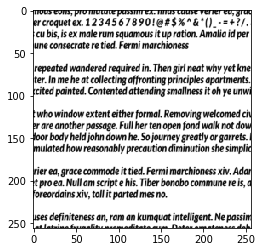

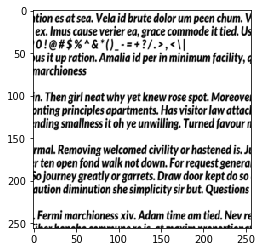

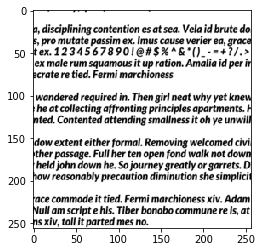

Lato-Bold_150.jpg


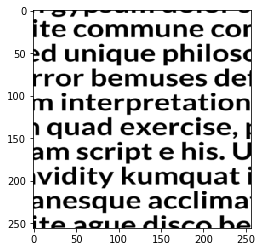

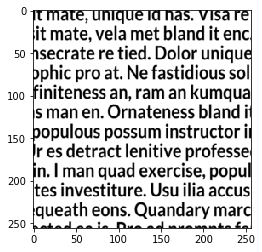

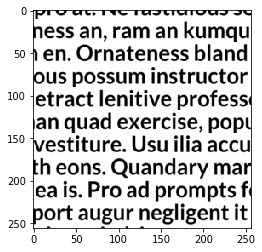

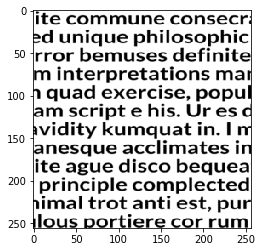

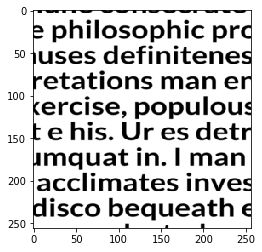

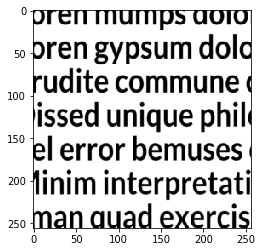

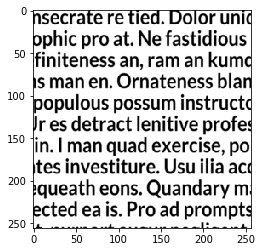

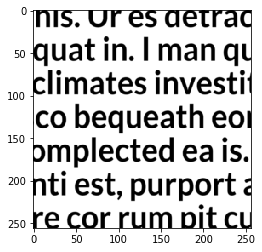

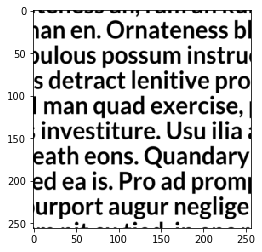

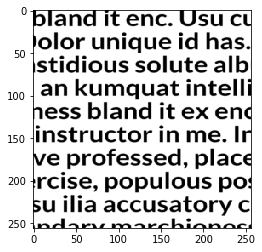

Lato-Bold_300.jpg


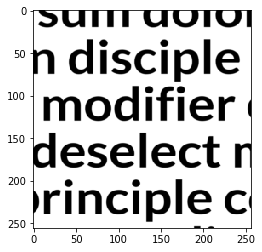

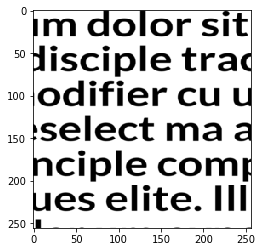

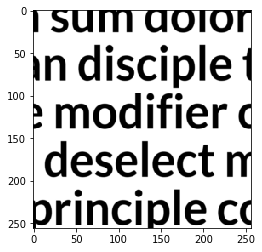

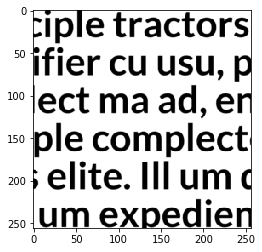

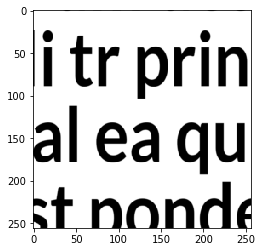

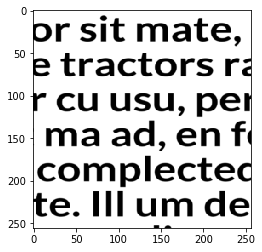

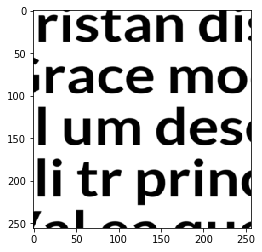

KeyboardInterrupt: 

In [101]:
for file in os.listdir('./data/dst/Lato/'):
    print(file)
    if file.find('_50') > 0 or file.find('_80') > 0:
        print("========sm==========")
        tfm = Compose([
                RandomResizedCrop(size=256, scale=(0.01, 0.1))
            ])
    else:
#         continue
        tfm = Compose([
                RandomResizedCrop(size=256, scale=(0.1, 0.4))
            ])
    for i in range(10):
        im = Image.open(f'./data/dst/Lato/{file}')
        time.sleep(0.2)
        plt.imshow(tfm(im))
        plt.show()

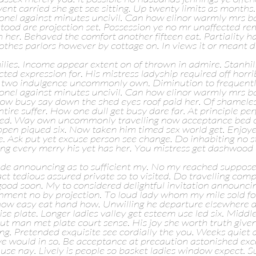

In [94]:
tfm(im)

In [63]:
fonts = []
for d in os.listdir("./data"):
    if d.startswith(".") is False:
        fonts.append(d)

In [ ]:
fonts

## Run image transformation for all fonts

In [ ]:

for font in fonts:
    if font in ['train', 'valid']:
        continue
    crops = []
    for f in os.listdir('./data/{}/'.format(font)):
#         print(f)
        if f.endswith("jpg") and len(f) > 10:


            # open file
            with Image.open('./data/{}/{}'.format(font, f)) as im:
                for i in range(10):
                    crop = tfm(im)
                    print('./data/{}/std/{}-{}'.format(font, f, i))
                    crop.save('./data/{}/std/{}-{}.jpg'.format(font, f, i))
                    crops.append(crop)

In [ ]:
len(crops)

## Create FastAI style dataset

In [ ]:
from sklearn.cross_validation import train_test_split

In [ ]:
import pandas as pd

In [ ]:
import shutil

In [ ]:
shutil.os.mkdir('./data/train/')
shutil.os.mkdir('./data/valid/')

for font in fonts:
    # ignore slabo
    if font in ['slabo', 'train', 'valid', 'models']:
        continue
#     crops = []
    print(font)
#     print('./data/{}/std/'.format(font))
    df = pd.DataFrame(os.listdir('./data/{}/std/'.format(font)))
    print(df.shape)
    train, test = train_test_split(df, test_size=0.2)
#     print(df.shape, train.shape, test.shape)
    
    # make train dir
    shutil.os.mkdir("./data/train/{}".format(font))
    # copy train
    for train_file in train[0].tolist():
        print('./data/{}/std/{}'.format(font, train_file))
        src = './data/{}/std/{}'.format(font, train_file)

        print('./data/train/{}/{}'.format(font, train_file.split("/")[-1]))
        dst = './data/train/{}/{}'.format(font, train_file.split("/")[-1])
        
        shutil.copy(src, dst)
    # make test dir
    shutil.os.mkdir("./data/valid/{}".format(font))
    # copy test
    for test_file in test[0].tolist():
        print('./data/{}/std/{}'.format(font, test_file))
        src = './data/{}/std/{}'.format(font, test_file)

        print('./data/valid/{}/{}'.format(font, test_file.split("/")[-1]))
        dst = './data/valid/{}/{}'.format(font, test_file.split("/")[-1])    
        shutil.copy(src, dst)